## MNIST Digits Classification - Binary Case

In this exercise, you will implement a binary classification of MNIST digits. You will restrict the classification problem to two digits selected from the MNIST dataset.

You will conduct the follwing steps:
1. Prepare the data: 
    * Load the MNIST dataset
    * Select the digits
    * Split the dataset into train and test (we keep it simpler at the moment and ignore the validation set)
    * Standardize the data


2. Implement the training algorithm consisting of
    * sigmoid model function and predict function
    * cost function
    * parameter update rules 
    * optimize loop


3. Train the model for specific settings and get a feeling for how the training evolves
    * learning rate
    * number of epochs
    * CE / MSE loss
    * differently, randomly initialized weights
    
Some of the functions are already implemented. You just need to use these functions - but we highly recommend to inspect them and try to understand each and every line of the code. - In case you have suggestions for improvements we are very happy to receive your feedback.

Other functions need to be implemented by you. Carefully read the markdown sections and also the doc-strings and run the test cells often given in the cell right after. 

The following notation is used: <br>
<code>m</code>: Number of samples <br>
<code>n</code>: Number of features

### 1. Data Preparation

Some preparatory steps to be applied before training:
* Loading the data
* Some plots
* Filtering the dataset for two digits
* Splitting the dataset into train and test
* Normalizing the data

#### Data Folder

The data can be loaded by using suitable functionality in sklearn which will use a dedicated folder on your local disk for caching. Specify the folder to be used with a variable of your choice. 

In [1]:
### START YOUR CODE ###

# adjust:
path_data = './data/'

### END YOUR CODE ###

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#### Plotting Utility

In [3]:
def plot_img(img, label, shape):
    """
    Plot the x array by reshaping it into a square array of given shape
    and print the label.
    
    Parameters:
    img -- array with the intensities to be plotted of shape (shape[0]*shape[1])
    label -- label 
    shape -- 2d tuple with the dimensions of the image to be plotted.
    """
    plt.imshow(np.reshape(img, shape), cmap=plt.cm.gray)
    plt.title("Label %i"%label)

def plot_digits(x,y,selection,shape,selected_digits, cols=5):
    """
    Plots the digits in a mosaic with up to 8 columns

    Arguments:
    x -- array of images of size (n,m)
    y -- array of labels of size (1,m)
    selection -- list of selection of samples to be plotted
    shape -- shape of the images (a 2d tuple)
    selected_digits -- tuple with the two selected digits (the first associated with label 1, the second with label 0)
    """
    if len(selection)==0:
        print("No images in the selection!")
        return
    cols = min(cols, len(selection))
    rows = int(len(selection)/cols)+1
    plt.figure(figsize=(20,4*rows))
    digit1 = selected_digits[0]
    digit2 = selected_digits[1]    
    for index, (image, label) in enumerate(zip(x.T[selection,:], y.T[selection,:])):
        digit = digit1 if label==1 else digit2
        plt.subplot(rows, cols, index+1)
        plt.imshow(np.reshape(image, shape), cmap=plt.cm.gray)
        plt.title('Sample %i\n Label %i\n' % (selection[index],digit), fontsize = 12)
    plt.tight_layout()

#### Load Data 

Follow the instructions in the doc string of the <span style="color:blue">load_mnist</span>-method defined below so that you can load the "MNIST original" dataset.

Load the data MNIST dataset and plot the 17th image by using the <span style="color:blue">plot_image</span>-method defined above.

In [4]:
from sklearn.datasets import fetch_openml

def load_mnist(datadir):
    """
    Loads the mnist dataset, prints the shape of the dataset and 
    returns the array with the images, the array with associated labels 
    and the shape of the images. Possibly, the data needs to be fetched 
    manually beforehand and put into the folder DATA_HOME/mldata 
    (see https://stackoverflow.com/questions/53096977/mnist-data-download-from-sklearn-datasets-gives-timeout-error)
    
    Returns:
    x -- array with images of shape (784,m) where m is the number of images
    y -- array with associated labels with shape (m,) where m is the number of images
    shape -- (28,28)
    """
    mnist = fetch_openml('mnist_784', data_home=datadir)
    x, y = mnist['data'].T, np.array(mnist['target'], dtype='int').T
    m = x.shape[1]
    y = y.reshape(1,m)
    print("Loaded MNIST original:")
    print("Image Data Shape" , x.shape)
    print("Label Data Shape", y.shape)
    return x,y,(28,28)

Loaded MNIST original:
Image Data Shape (784, 70000)
Label Data Shape (1, 70000)


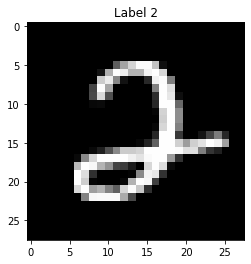

In [5]:
x, y, shape = load_mnist(path_data)

### START YOUR CODE ###

img_idx = 16
plot_img(x[:,img_idx], y[0][img_idx], shape)

### END YOUR CODE ###

In [6]:
print(x.shape)
print(y.shape)

(784, 70000)
(1, 70000)


#### Filter the data for two selected digits and split it into train/test

Load the MNIST dataset (by using <span style="color:blue">load_mnist</span> from above), filter it to only use the digits '1' and '7' (by using the method <span style="color:blue">filter_digits</span> and split up the result further into a training and a test set (by using the <span style="color:blue">prepare_train_test</span>). Use a 80-20 split of the data into train and test.

Furthermore, bring the input data (x) into the shape (n,m) where n is the number of input features and m the number of samples.  
As a result, you can run the test which should not produce any exception.

In [7]:
def filter_digits(x, y, selected_digits):
    """
    Filter the dataset for given two digits (label values between 0 and 9).
    The samples with the first digit will be associated with the label 1, the second with 0.  
    
    Parameters:
    x -- Array of images of shape (n,m) where m is the number of samples
    y -- Array of labels of shape (1,m) where m is the number of samples
    digits -- tuple with two values
    
    Returns:
    x1 -- filtered list of images of shape (n,m1)
    y1 -- filtered list of labels of shape (1,m1)
    """
    # select two given digits - will the train a model that learns to differentiate between the two
    
    digit1, digit2 = selected_digits
    
    idx_digit1 = (y[0, :] == digit1)
    idx_digit2 = (y[0, :] == digit2)
    
    idx_combined = (idx_digit1 | idx_digit2)
    
    x1 = x[:, idx_combined]
    y1 = y[:, idx_combined]
    
    idx_digit1 = (y1[0, :] == digit1)
    idx_digit2 = (y1[0, :] == digit2)
    
    y1[:, idx_digit1] = 1
    y1[:, idx_digit2] = 0
    

    print("Selecting {} images with digit {} and {} images with digit {}".format(
        np.sum(idx_digit1),digit1,np.sum(idx_digit2),digit2))
    return x1,y1

In [8]:
from sklearn.model_selection import train_test_split

def prepare_train_test(x, y, test_size=0.20):
    """
    Split the dataset consisting of an array of images (shape (m,n)) and an array of labels (shape (n,))
    into train and test set.
    
    Parameters:
    x -- Array of images of shape (n,m) where m is the number of samples
    y -- Array of labels of shape (m,) where m is the number of samples
    test_size -- fraction of samples to reserve as test sample
    
    Returns:
    x_train -- list of images of shape (n,m1) used for training
    y_train -- list of labels of shape (1,m1) used for training
    x_test -- list of images of shape (n,m2) used for testing
    y_test -- list of labels of shape (1,m2) used for testing
    """
    # split 
    # We use the functionality of sklearn which assumes that the samples are enumerated with the first index 
    x_train, x_test, y_train, y_test = train_test_split(x.T, y.T, test_size=0.20, random_state=1)

    # reshape - transpose back the output obtained from the train_test_split-function
    x_train = x_train.T
    x_test = x_test.T
    m_train = x_train.shape[1]
    m_test = x_test.shape[1]
    y_train=y_train.reshape(1,m_train)
    y_test=y_test.reshape(1,m_test)

    print("Shape training set: ", x_train.shape, y_train.shape)
    print("Shape test set:     ", x_test.shape, y_test.shape)
    
    return x_train, x_test, y_train, y_test

In [9]:
### START YOUR CODE ###
# call the arrays x_train1, y_train, x_test1, y_test

x_1_7, y_1_7 = filter_digits(x, y, (1,7))
x_train1, x_test1, y_train, y_test = prepare_train_test(x_1_7, y_1_7)

### END YOUR CODE ###

Selecting 7877 images with digit 1 and 7293 images with digit 7
Shape training set:  (784, 12136) (1, 12136)
Shape test set:      (784, 3034) (1, 3034)


In [10]:
## TEST ##
np.testing.assert_array_equal(x_train1.shape, (784, 12136))
np.testing.assert_array_equal(y_train.shape, (1, 12136))
np.testing.assert_array_equal(x_test1.shape, (784, 3034))
np.testing.assert_array_equal(y_test.shape, (1, 3034))

#### Data Normalisation

Normalize the data - by using z-normalization computed over all pixels. 
Test that the result is expected.

In [11]:
def normalize(x_train,x_test):
    """
    Normalizes the pixels values of the images - mean and stdev are computed from the training set.
    
    Parameters:
    x_train -- Array of training samples of shape (n,m1) where n,m1 are the number of features and samples, respectively.  
    x_test -- Array of test samples of shape (n,m2) where n,m2 are the number of features and samples, respectively. 
    
    Returns:
    The arrays with the normalized train and test samples.  
    """
    ### START YOUR CODE ###
    
    # mean uk
    uk = np.mean(x_train)
    
    # standard deviation sk
    sk = np.std(x_train)
    
    x_train = (x_train - uk)/sk
    x_test = (x_test - uk)/sk
    
    ### END YOUR CODE ###
    return x_train, x_test

In [12]:
## TEST ##
xunittest_train = np.array([0,3,2,5,10,9]).reshape(1,6).astype(np.float64)
xunittest_test = np.array([11,20,1,-1]).reshape(1,4).astype(np.float64)
x1,x2 = normalize(xunittest_train, xunittest_test)
np.testing.assert_array_almost_equal(x1,np.array([-1.33342142, -0.50578054, -0.78166083,  0.04598005,  1.42538152,  1.14950122]).reshape(1,6),decimal=8)
np.testing.assert_array_almost_equal(x2,np.array([1.70126181,  4.18418446, -1.05754113, -1.60930171]).reshape(1,4),decimal=8)

In [13]:
x_train,x_test = normalize(x_train1,x_test1)

### 2. Implementation

#### Perceptron-Model

In [14]:
def sigmoid(z):
    """
    Compute the sigmoid of z
    Arguments:
    z -- A scalar or numpy array of any size.
    Return:
    s -- sigmoid(z)
    """
    ### START YOUR CODE ###
    
    s = 1/(1+np.exp(-z))
    return s
    
    ### END YOUR CODE ###

In [15]:
# TEST
zunittest = np.array([1,-2,2,0]).reshape(1,4)
yunittest = sigmoid(zunittest)
ytrue = np.array([0.73105858, 0.11920292, 0.88079708, 0.5]).reshape(1,4)
np.testing.assert_array_almost_equal(yunittest,ytrue,decimal=8)

In [16]:
def predict(w, b, X, round=False):
    '''
    Compute the prediction for each of the m samples by using the parameters (w, b).
    
    Arguments:
    w -- weights, a numpy array with shape (1, n)
    b -- bias, a scalar
    X -- data of size (n,m)
    round -- return the score (number in [0,1]) if False, or round to 0 or 1 if True.
    
    Returns:
    predictions -- a numpy array (vector) containing all predictions
    '''    
    ### START YOUR CODE ### 

    predictions = sigmoid(np.dot(w,X)+b)
    
    if (round):
      predictions[predictions>=.5] = 1.
      predictions[predictions<.5] = 0.
    
    return predictions
    
    ### END YOUR CODE ###


In [17]:
# TEST
X = np.array([1,-2,2,1]).reshape(4,1)
w = np.array([1,1,0.75,0]).reshape(1,4)
b = -0.25

yunittest = predict(w,b,X)
ytrue = np.array([sigmoid(0.25)]).reshape(1,1)
np.testing.assert_array_almost_equal(yunittest,ytrue,decimal=8)

yunittest = predict(w,b,X, round=True)
ytrue = np.array([1]).reshape(1,1)
np.testing.assert_array_almost_equal(yunittest,ytrue,decimal=8)

#### Cost Function

* Cross-Entropy Cost Function
* Mean Square Error Function

In [18]:
def cost_CE(ypred, y, eps=1.0e-12):
    """
    Computes the cross entropy cost function for given predicted values and labels.
    It clips (using numpy clip) predicted values to be in the interval [eps,1-eps] so that numerical 
    issues with the calculation of logarithm are avoided.
    
    Parameters:
    ypred -- Predicted values, a numpy array with shape (1,m).
    y -- Ground truth values (labels 0 or 1), a numpy array with shape (1,m)
    
    Returns:
    Cross Entropy Cost
    """
    # sanity checks:
    try:
        if ypred.shape != y.shape:
            raise AttributeError("The two input arguments ypred and y should be numpy arrays of the same shape.")
    except Exception:
        raise AttributeError("Wrong type of argument - ypred and y should be a numpy array")

    # clip predicted values and compute the cost
    
    ### START YOUR CODE ### 

    ypred = np.clip(ypred, eps, 1-eps)
    J = y*np.log(ypred)
    J += (1-y)*np.log(1-ypred)
    J = J.sum()
    J /= y.shape[1]
    J *= -1
    
    ### END YOUR CODE ### 
    return J


In [19]:
# TEST
# CASE 1: Numeric value computed correctly
yhat = np.array([0.1,0.2,0.5,0.8,0.9,1.0]).reshape(1,6)
yunittest = np.array([0,1,1,0,1,1]).reshape(1,6)
J = cost_CE(yhat,yunittest)
Jtrue = -(np.log(0.2)+np.log(0.5)+np.log(0.9)+np.log(1.0)+np.log(0.9)+np.log(0.2))/6
np.testing.assert_array_almost_equal(J,Jtrue,decimal=8)

# CASE 2: Both arguments should be numpy arrays of the same shape
try:
    cost_CE(1,1)
except AttributeError:
    print("Exception ok")
    
# CASE 3: Both arguments should be numpy arrays of the same shape
try:
    cost_CE(yhat,1)
except AttributeError:
    print("Exception ok")

Exception ok
Exception ok


In [20]:
def cost_MSE(ypred, y):
    """
    Computes the mean square error cost function for given predicted values and labels.
    
    Parameters:
    ypred -- A scalar or numpy array with shape (1,m).
    y -- A scalar or numpy array with shape (1,m).
    
    Returns:
    MSE Cost
    """    
    # sanity checks:
    try:
        if ypred.shape != y.shape:
            raise AttributeError("The two input arguments ypred and y should be numpy arrays of the same shape.")
    except Exception:
        raise AttributeError("Wrong type of argument - ypred and y should be a numpy array")

    ### START YOUR CODE ### 

    J = (ypred-y)**2
    J /= 2*J.shape[1]
    J = J.sum()

    ### END YOUR CODE ### 
    return J

In [21]:
# TEST
# CASE 1: Numeric value computed correctly
yhat = np.array([0.1,0.2,0.5,0.8,0.9,1.0]).reshape(1,6)
yunittest = np.array([0,1,1,0,1,1]).reshape(1,6)
J = cost_MSE(yhat,yunittest)
Jtrue = (0.01+0.64+0.25+0.64+0.01)/12
np.testing.assert_almost_equal(J,Jtrue,decimal=8)

# CASE 2: Both arguments should be numpy arrays of the same shape
try:
    cost_MSE(1,1)
except AttributeError:
    print("Exception ok")
    
# CASE 3: Both arguments should be numpy arrays of the same shape
try:
    cost_MSE(yhat,1)
except AttributeError:
    print("Exception ok")

Exception ok
Exception ok


#### Update Rules for the Parameters

Different update rules associated with the different cost functions.

In [22]:
def step_CE(X, Y, Ypred):
    """
    Computes the update of the weights and bias from the gradient of the cross entropy cost. 
    
    Arguments:
    X -- data of size (n, m)
    Y -- label vector (1, m)
    Ypred -- predicted scores (1, m)

    Returns: 
    Dictionary with the gradient w.r.t. weights ('dw') and w.r.t. bias ('db')
    """

    ### START YOUR CODE ### 
    
    # slide 61
    dw = np.dot((Ypred-Y), X.T)/X.shape[1]
    db = np.sum((Ypred-Y))/X.shape[1]
    
    ### END YOUR CODE ### 
    
    return {"dw": dw, "db": db}

In [23]:
# TEST
xunittest = np.array([[1,2,3],[4,5,6]]).reshape(2,3)
yunittest = np.array([1,0,1]).reshape(1,3)
ypred = np.array([0.8,0.3,0.9]).reshape(1,3)

res = step_CE(xunittest,yunittest,ypred)
dwtrue = np.array([0.033333333,0.033333333]).reshape(1,2)
np.testing.assert_almost_equal(res["dw"],dwtrue,decimal=8)

In [24]:
def step_MSE(X, Y, Ypred):
    """
    Computes the update of the weights and bias from the gradient of the mean square error cost. 

    Arguments:
    X -- data of size (n, m)
    Y -- label vector (1, m)
    Ypred -- predicted scores (1, m)

    Returns:
    Dictionary with the gradient w.r.t. weights ('dw') and w.r.t. bias ('db')
    """
    
    ### START YOUR CODE ### 

    # slide 45
    dw = np.dot((Ypred*(1-Ypred)*(Ypred-Y)),X.T)/X.shape[1]
    db = np.sum(Ypred*(1-Ypred)*(Ypred-Y))/X.shape[1]

    ### END YOUR CODE ### 
        
    return {"dw": dw, "db": db}

In [25]:
# TEST
xunittest = np.array([[1,2,3],[4,5,6]]).reshape(2,3)
yunittest = np.array([1,0,1]).reshape(1,3)
ypred = np.array([0.8,0.3,0.9]).reshape(1,3)

res = step_MSE(xunittest,yunittest,ypred)
dwtrue = np.array([0.02233333,0.04433333]).reshape(1,2)
np.testing.assert_almost_equal(res["dw"],dwtrue,decimal=8)

#### Error rate

In [26]:
def error_rate(Ypred, Y):
    """
    Computes the error rate defined as the fraction of misclassified samples.
    
    Arguments:
    Ypred -- predicted scores with values in [0,1], array of shape (1,m)
    Y -- ground truth labels with values in {0,1}, array of shape (1,m)

    Returns:
    error_rate 
    """
    ### START YOUR CODE ### 

    return np.sum(np.round(Ypred) != Y) / Y.size
  
    ### END YOUR CODE ### 

In [27]:
# TEST
yunittest = np.array([1,0,1,1,0])
ypred = np.array([0.9,0.1,0.4,0.8,0.7])
np.testing.assert_almost_equal(error_rate(ypred, yunittest),0.4,decimal=8)

#### Initialize Parameters

First we provide a utility method to generate properly intialized parameters. You will learn later more details about it.

In [28]:
def initialize_params(n, random=False):
    """
    This function provides initialized parameters: a vector of shape (1,n) as weights and a scalar equal to zero as bias. 
    
    Argument:
    n -- size of the w vector we want (number of features)
    rand -- if set to True stand norma distributed values are set for the weights; otherwise zeros are used.
    
    Returns:
    w -- initialized vector of shape (1,n)
    b -- initialized scalar (corresponds to the bias)
    """
    if random:
        w = np.random.randn(*(1,n)) / np.sqrt(n)
    else:
        w = np.zeros((1,n))
    b = 0.0
    
    return w, b

In [29]:
# TEST
w0, b0 = initialize_params(100)
np.testing.assert_array_equal(w0.shape, (1,100))

w0, b0 = initialize_params(100, random=True)
np.testing.assert_array_equal(w0.shape, (1,100))
np.testing.assert_almost_equal(np.mean(w0),0.0,decimal=0.1)

#### Metrics Class

For not littering the optimization loop with code to keep track of the learning results over the epochs we defined a suitable metrics class that keeps all the data (cost function, classification error vs epochs). It also provides utility methods for updating, printing values or plotting the learning curves.

It is defined as python class the metrics object then needs to be instantiated from. It means that some small knowledge about object-oriented programming is needed here.   

In [30]:
class Metrics():
    """
    Allows to collect statistics (such as classification error or cost) that are of interest over the course of training
    and for creating learning curves that are a useful tool for analyzing the quality of the learning.
    """
    
    def __init__(self, cost_function=cost_CE):
        """
        Constructor for a metrics object. 
        Initializes all the statistics to track in form of python lists.
        
        Parameters:
        cost_function -- a function object that allows to compute the cost.
        """
        self.epochs = []
        self.train_costs = []
        self.test_costs = []
        self.train_errors = []
        self.test_errors = []
        self.stepsize_w = []
        self.stepsize_b = []
        self.cost_function = cost_function
    
    def update(self, epoch, ypred_train, y_train, ypred_test, y_test, dw, db):
        """
        Allows to update the statistics to be tracked for a new epoch.
        The cost is computed by using the function object passed to the constructor.
        
        Parameters:
        epoch -- Epoch
        ypred_train -- predicted values on the training samples, a numpy array of shape (1,m1)
        y_train -- ground truth labels associated with the training samples, a numpy array of shape (1,m1)
        ypred_test -- predicted values on the test samples, a numpy array of shape (1,m2)
        y_test -- ground truth labels associated with the test samples, a numpy array of shape (1,m2)
        dw -- some lenght measure for the gradient w.r.t. the weights, a scalar
        db -- gradient w.r.t. the bias, a scalar
        """       
        Jtrain = self.cost_function(ypred_train, y_train)
        Jtest = self.cost_function(ypred_test, y_test)
        train_error = error_rate(ypred_train, y_train)
        test_error = error_rate(ypred_test, y_test)

        self.epochs.append(epoch)
        self.train_costs.append(Jtrain)
        self.test_costs.append(Jtest)
        self.train_errors.append(train_error)
        self.test_errors.append(test_error)
        self.stepsize_w.append(dw)
        self.stepsize_b.append(db)
        
    def print_latest_errors(self):
        print ("Train/test error after epoch %i: %f, %f (min: %f, %f)" %(self.epochs[-1], self.train_errors[-1], self.test_errors[-1], min(self.train_errors), min(self.test_errors)))
    
    def print_latest_costs(self):
        print ("Train/test cost after epoch %i: %f, %f" %(self.epochs[-1], self.train_costs[-1], self.test_costs[-1]))

    def plot_cost_curves(self, ymin=None, ymax=None, logy=True):
        minvalue = 1e-5
        if logy:
            plt.semilogy(self.epochs, self.train_costs, "b-", label="train")
            plt.semilogy(self.epochs, self.test_costs, "r-", label="test")
        else:
            plt.plot(self.epochs, self.train_costs, "b-", label="train")
            plt.plot(self.epochs, self.test_costs, "r-", label="test")            
            minvalue = 0.0
        plt.ylabel('Cost')
        plt.xlabel('Epochs')
        xmax = self.epochs[-1]
        if not ymin:
            ymin = min(max(minvalue,np.min(self.train_costs)),max(minvalue,np.min(self.test_costs))) * 0.8
        if not ymax:
            ymax = max(np.max(self.train_costs),np.max(self.test_costs)) * 1.2
        plt.axis([0,xmax,ymin,ymax])
        plt.legend()
        plt.show()        
    
    def plot_error_curves(self, ymin=None, ymax=None, logy=True):
        minvalue = 1e-5
        if logy:
            plt.semilogy(self.epochs, self.train_errors, "b-", label="train")
            plt.semilogy(self.epochs, self.test_errors, "r-", label="test")
        else:
            plt.plot(self.epochs, self.train_errors, "b-", label="train")
            plt.plot(self.epochs, self.test_errors, "r-", label="test")            
            minvalue = 0.0
        plt.ylabel('Errors')
        plt.xlabel('Epochs')
        xmax = self.epochs[-1]
        if not ymin:
            ymin = min(max(minvalue,np.min(self.train_errors)),max(minvalue,np.min(self.test_errors))) * 0.8
        if not ymax:
            ymax = max(np.max(self.train_errors),np.max(self.test_errors)) * 1.2
        plt.axis([0,xmax,ymin,ymax])
        plt.legend()
        plt.show()        

    def plot_stepsize_curves(self, ymin=None, ymax=None):
        plt.semilogy(self.epochs, self.stepsize_w, label="dw")
        plt.semilogy(self.epochs, self.stepsize_b, label="db")
        plt.ylabel('Step Sizes (dw,db)')
        plt.xlabel('Epochs')
        xmax = self.epochs[-1]
        if not ymin:
            ymin = min(max(1e-5,np.min(self.stepsize_w)),max(1e-5,np.min(self.stepsize_b))) * 0.8
        if not ymax:
            ymax = max(np.max(self.stepsize_w),np.max(self.stepsize_b)) * 1.2
        plt.axis([0,xmax,ymin,ymax])
        plt.legend()
        plt.show()        
 

In [31]:
#help(Metrics)

#### Optimisation

In [32]:
def optimize(w, b, x_train, y_train, x_test, y_test, nepochs, alpha, cost_type="CE", debug = False):
    """
    This function optimizes w and b by running (batch) gradient descent.
    
    Arguments:
    w -- weights, a numpy array of size (1,n)
    b -- bias, a scalar
    x -- array of samples of shape (n,m)
    y -- ground truth labels vector (containing 0 or 1) of shape (1, m)
    nepochs -- number of iterations of the optimization loop
    alpha -- learning rate of the gradient descent update rule
    cost -- type of cost function to use for the opimisation (CE or MSE)
    debug -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    metrics -- Metrics object that contains metrics collected while training was in progress    
    """ 
    if "CE" == cost_type:
        cost_function = cost_CE
        step_function = step_CE
    else:
        cost_function = cost_MSE
        step_function = step_MSE
    
    metrics = Metrics(cost_function=cost_function)

    # compute and set the initial values for the metrics curves  
    ypred_train = predict(w,b,x_train)
    ypred_test = predict(w,b,x_test)    
    metrics.update(0, ypred_train, y_train, ypred_test, y_test, 0, 0)
    
    ### START YOUR CODE ###
    for epoch in range(nepochs):
        # compute step -> Slide 43
        step = step_function(x_train, y_train, ypred_train)
        dw = step["dw"]
        db = step["db"]
        w = w - alpha * dw
        b = b - alpha * db
        
        ypred_train = predict(w, b, x_train)
        ypred_test = predict(w, b, x_test)
        
        ndw = np.linalg.norm(dw)
        ndb = np.linalg.norm(db)
        metrics.update(epoch+1, ypred_train, y_train, ypred_test, y_test, ndw, ndb)
        
        if debug:
            metrics.print_latest_costs()
            metrics.print_latest_errors()
  
    ### END YOUR CODE ### 
        
    # finally, we print the latest metrics values and return
    metrics.print_latest_costs()
    metrics.print_latest_errors()

    return {"w": w, "b": b}, metrics

### 3. Run the Training for Specific Settings

#### A first run
Compose that all in a single "pipeline" starting with selecting the digits in the data preparation up to performing the training.

Make a first test run with 
* learning rate 0.2
* 500 epochs
* CE loss

The training should not take more than a couple of seconds.

In [33]:
# preparing data

selected_digits = (1,7)

### START YOUR CODE ###

x_train1, x_test1, y_train, y_test = prepare_train_test(*filter_digits(x, y, selected_digits))
x_train, x_test = normalize(x_train1, x_test1)

### END YOUR CODE ###

Selecting 7877 images with digit 1 and 7293 images with digit 7
Shape training set:  (784, 12136) (1, 12136)
Shape test set:      (784, 3034) (1, 3034)


In [34]:
# run the training here

### START YOUR CODE ###

np.random.seed(1) # this makes the results reproduceable - change this if you want to see other initial weights

learning_rate = 0.2
nepochs = 500

w,b = initialize_params(x_train.shape[0], random=False)
params,metrics = optimize(w, b, x_train, y_train, x_test, y_test, nepochs, learning_rate, cost_type="CE", debug = False)


### END YOUR CODE ###

Train/test cost after epoch 500: 0.011005, 0.012990
Train/test error after epoch 500: 0.003131, 0.004285 (min: 0.003131, 0.003626)


#### Plot Learning Curves

Cost <br>
Error Rate <br>
Learning Speed (Lenght of Parameter Change)<br>

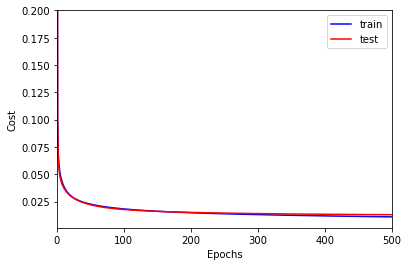

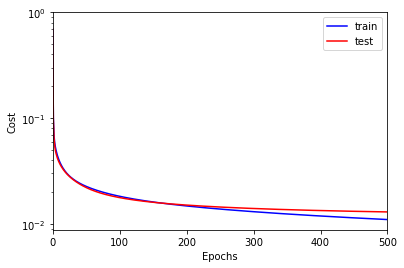

In [35]:
metrics.plot_cost_curves(ymin=0.001, ymax=0.2,logy=False)
metrics.plot_cost_curves(ymin=0, ymax=1,logy=True)

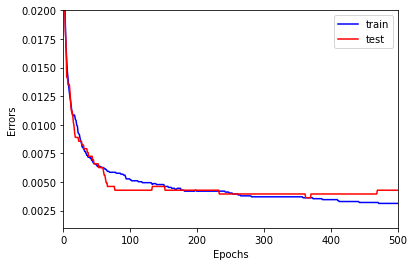

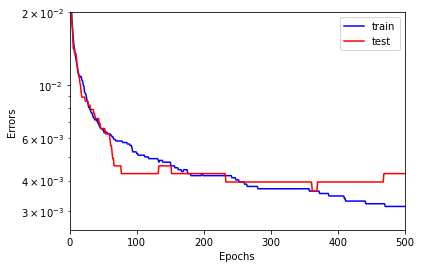

In [36]:
metrics.plot_error_curves(ymin=0.001, ymax=0.02,logy=False)
metrics.plot_error_curves(ymax=0.02, logy=True)

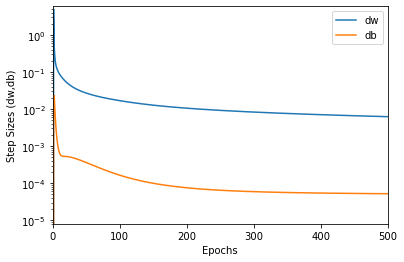

In [37]:
metrics.plot_stepsize_curves()

#### Plot misclassified digits 

Plot misclassified digits and judge (with your human eye) whether the given digits should have been correctly recognized by the model or whether the digit is written with a bad handwriting.

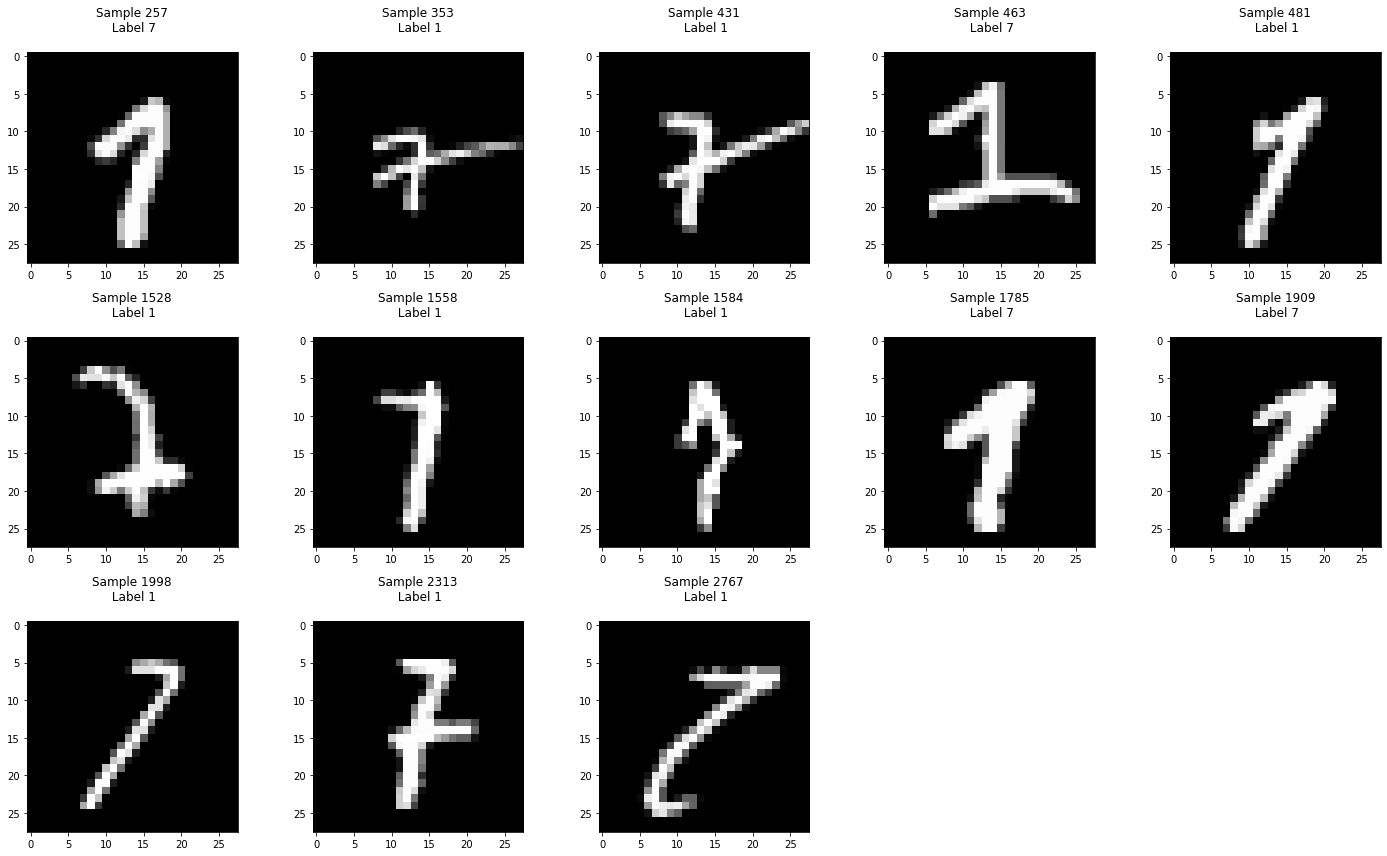

In [38]:
### START YOUR CODE ### 

y_pred = predict(params['w'], params['b'], x_test, round=True)
idx = np.where(y_test != y_pred)[1]

plot_digits(x_test, y_pred, idx, shape, selected_digits, cols=5)

### END YOUR CODE ### 

#### Evaluate Dependency on Learning Rate and #Epochs 

Try different learning rates (e.g. 0.1, 0.2, 0.5, 1.0) and explore how many epochs you need to obtain stable results.
* Inspect the error rate curves to make sure that the rates reported in the table are stable. 
    * As it can be seen in the following four plots, the test error-rates are stable after 100-200 epochs.
* Describe the characteristic behavior of the error rate curves for different learning rates.
    * A larger learning rate will reach the stable area earlier, than a small learning rate. Nevertheless, the goal is to have a high learning rate as possible to reach the steady test-error as fast as possible, but the learning rate should not be too high, since it could fail to find the optimum values. -> Try to find the sweet spot.

Train/test cost after epoch 500: 0.013942, 0.014552
Train/test error after epoch 500: 0.004038, 0.003955 (min: 0.004038, 0.003955)


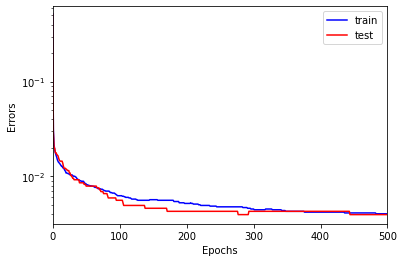

Train/test cost after epoch 500: 0.007345, 0.012272
Train/test error after epoch 500: 0.002307, 0.003296 (min: 0.002225, 0.003296)


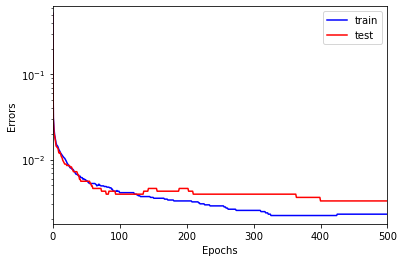

Train/test cost after epoch 500: 0.011005, 0.012990
Train/test error after epoch 500: 0.003131, 0.004285 (min: 0.003131, 0.003626)


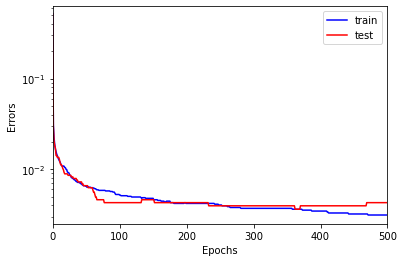

Train/test cost after epoch 500: 0.004872, 0.014159
Train/test error after epoch 500: 0.001895, 0.003626 (min: 0.001895, 0.003296)


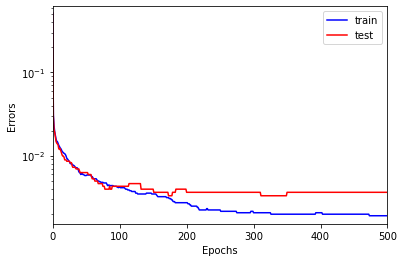

In [39]:
np.random.seed(1) # this makes the results reproduceable - change this if you want to see other initial weights

# params to play around
learning_rates = {0.1,0.2,0.5,1}
nepochs = 500

for lr in learning_rates:

    w,b = initialize_params(x_train.shape[0], random=False)
    params,metrics = optimize(w, b, x_train, y_train, x_test, y_test, nepochs, lr, cost_type="CE", debug = False)

    metrics.plot_error_curves()

* Summarize the results in a small table with (learning rate, # epochs, training and test error rates.


In [40]:
np.random.seed(1) # this makes the results reproduceable - change this if you want to see other initial weights

learning_rates = [0.001, 0.01, 0.1, 1, 10]
epochs = [100, 500, 1000, 1500]

lr_history = []
epoch_history = []
train_error_rates_last = []
train_error_rates_min = []
test_error_rates_last = []
test_error_rates_min = []

for lr in learning_rates:
    for epoch in epochs:
        lr_history.append(lr)
        epoch_history.append(epoch)
        
        w,b = initialize_params(x_train.shape[0], random=False)
        params,metrics = optimize(w, b, x_train, y_train, x_test, y_test, epoch, lr, cost_type="CE", debug = False)

        train_error_rates_last.append(metrics.train_errors[-1])
        train_error_rates_min.append(np.min(metrics.train_errors))
        
        test_error_rates_last.append(metrics.test_errors[-1])
        test_error_rates_min.append(np.min(metrics.test_errors))


Train/test cost after epoch 100: 0.168623, 0.166402
Train/test error after epoch 100: 0.026203, 0.022742 (min: 0.026121, 0.022742)
Train/test cost after epoch 500: 0.072750, 0.071498
Train/test error after epoch 500: 0.017221, 0.018787 (min: 0.017221, 0.018787)
Train/test cost after epoch 1000: 0.053948, 0.052983
Train/test error after epoch 1000: 0.014090, 0.014832 (min: 0.014090, 0.014832)
Train/test cost after epoch 1500: 0.045978, 0.045122
Train/test error after epoch 1500: 0.012690, 0.012195 (min: 0.012690, 0.012195)
Train/test cost after epoch 100: 0.053704, 0.052744
Train/test error after epoch 100: 0.014090, 0.014832 (min: 0.014090, 0.014832)
Train/test cost after epoch 500: 0.029678, 0.028856
Train/test error after epoch 500: 0.008240, 0.007910 (min: 0.008240, 0.007910)
Train/test cost after epoch 1000: 0.023380, 0.022523
Train/test error after epoch 1000: 0.006262, 0.005274 (min: 0.006262, 0.005274)
Train/test cost after epoch 1500: 0.020425, 0.019700
Train/test error after e

<ipython-input-14-da235201c826>:11: RuntimeWarning: overflow encountered in exp
  s = 1/(1+np.exp(-z))


Train/test cost after epoch 100: 0.086236, 0.076470
Train/test error after epoch 100: 0.004450, 0.004614 (min: 0.004450, 0.003955)
Train/test cost after epoch 500: 0.005812, 0.076903
Train/test error after epoch 500: 0.000824, 0.004614 (min: 0.000824, 0.003296)
Train/test cost after epoch 1000: 0.000252, 0.071407
Train/test error after epoch 1000: 0.000000, 0.004285 (min: 0.000000, 0.003296)
Train/test cost after epoch 1500: 0.000115, 0.070573
Train/test error after epoch 1500: 0.000000, 0.003955 (min: 0.000000, 0.003296)


In [41]:
import pandas as pd

"""
lr_history = []
epoch_history = []
train_error_rates_last = []
train_error_rates_min = []
test_error_rates_last = []
test_error_rates_min = []
"""

dict = {'learning rate': lr_history,
        'nr. of epochs': epoch_history,
        'last training error': train_error_rates_last,
        'min. training error': train_error_rates_min,
        'last test error': test_error_rates_last,
        'min. test error': test_error_rates_min
       }  

df = pd.DataFrame(dict) 
df 

,learning rate,nr. of epochs,last training error,min. training error,last test error,min. test error
0,0.001,100,0.026203,0.026121,0.022742,0.022742
1,0.001,500,0.017221,0.017221,0.018787,0.018787
2,0.001,1000,0.014090,0.014090,0.014832,0.014832
3,0.001,1500,0.012690,0.012690,0.012195,0.012195
4,0.010,100,0.014090,0.014090,0.014832,0.014832
5,0.010,500,0.008240,0.008240,0.007910,0.007910
6,0.010,1000,0.006262,0.006262,0.005274,0.005274
7,0.010,1500,0.005603,0.005521,0.004614,0.004614
8,0.100,100,0.006262,0.006262,0.005603,0.005603
9,0.100,500,0.004038,0.004038,0.003955,0.003955


* Estimate the error bar in the estimation of the test error rates when varying the iniitial weights.

In [42]:
np.random.seed() 

learning_rate = 0.2
nepochs = 500

test_error_rates_last = []
test_error_rates_min = []

for i in range(100):
    w,b = initialize_params(x_train.shape[0], random=True)
    params,metrics = optimize(w, b, x_train, y_train, x_test, y_test, nepochs, learning_rate, cost_type="CE", debug = False)

    test_error_rates_last.append(metrics.test_errors[-1])
    test_error_rates_min.append(np.min(metrics.test_errors))
    

Train/test cost after epoch 500: 0.011166, 0.012977
Train/test error after epoch 500: 0.003296, 0.003955 (min: 0.003296, 0.003955)
Train/test cost after epoch 500: 0.011053, 0.013538
Train/test error after epoch 500: 0.003378, 0.004285 (min: 0.003378, 0.003955)
Train/test cost after epoch 500: 0.010899, 0.012829
Train/test error after epoch 500: 0.003131, 0.003955 (min: 0.003131, 0.003626)
Train/test cost after epoch 500: 0.011117, 0.012882
Train/test error after epoch 500: 0.003296, 0.004285 (min: 0.003296, 0.003955)
Train/test cost after epoch 500: 0.010917, 0.012972
Train/test error after epoch 500: 0.003131, 0.004614 (min: 0.003131, 0.004285)
Train/test cost after epoch 500: 0.011139, 0.013264
Train/test error after epoch 500: 0.003296, 0.004285 (min: 0.003296, 0.003955)
Train/test cost after epoch 500: 0.010892, 0.012752
Train/test error after epoch 500: 0.003131, 0.004614 (min: 0.003131, 0.003955)
Train/test cost after epoch 500: 0.010884, 0.012779
Train/test error after epoch 50

Train/test cost after epoch 500: 0.011171, 0.013199
Train/test error after epoch 500: 0.003131, 0.004614 (min: 0.003131, 0.004285)
Train/test cost after epoch 500: 0.010928, 0.013371
Train/test error after epoch 500: 0.003214, 0.004285 (min: 0.003214, 0.004285)
Train/test cost after epoch 500: 0.011105, 0.012857
Train/test error after epoch 500: 0.002966, 0.003955 (min: 0.002966, 0.003626)
Train/test cost after epoch 500: 0.010977, 0.012894
Train/test error after epoch 500: 0.003214, 0.003626 (min: 0.003214, 0.003296)
Train/test cost after epoch 500: 0.011202, 0.013072
Train/test error after epoch 500: 0.003214, 0.003955 (min: 0.003214, 0.003626)
Train/test cost after epoch 500: 0.010804, 0.013378
Train/test error after epoch 500: 0.003214, 0.004285 (min: 0.003214, 0.003626)
Train/test cost after epoch 500: 0.010949, 0.013103
Train/test error after epoch 500: 0.003049, 0.004285 (min: 0.003049, 0.003955)
Train/test cost after epoch 500: 0.011044, 0.013000
Train/test error after epoch 50

The 95% confidence interval for the last-test-error rates       ranges from 0.0041362931781299276 to 0.0042618610736828615.
The 95% confidence interval for the min-test-error rates       ranges from 0.0038461112857866545 to 0.003958766762993831.


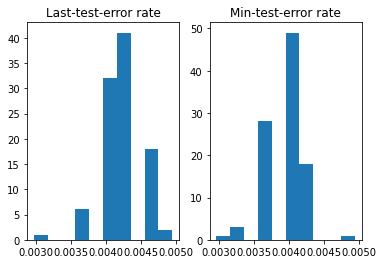

In [43]:
import scipy

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

plt.figure()

mean, conf_min, conf_max = mean_confidence_interval(test_error_rates_last)
print("The 95% confidence interval for the last-test-error rates \
      ranges from {} to {}.".format(conf_min,conf_max))

plt.subplot(1,2,1)
plt.hist(test_error_rates_last)
plt.title("Last-test-error rate")

mean, conf_min, conf_max = mean_confidence_interval(test_error_rates_min)
print("The 95% confidence interval for the min-test-error rates \
      ranges from {} to {}.".format(conf_min,conf_max))

plt.subplot(1,2,2)
plt.hist(test_error_rates_min)
plt.title("Min-test-error rate")
plt.show()

#### Evaluate Dependency on Cost Function

Compare the train and test error curves for the learning rate 0.2 when using cross-entropy loss with when using the mean square error loss.

Answer:
Both loss-functions lead approximately to the same test-error of about 0.004X. Nevertheless, the big advantage of the cross-entropy loss (CE) against the mean-squared-error (MSE) can be observed in the following two plots quite clearly. While the MSE error curve goes down very slowly, the CE error curve goes down more steep at the beginning. This means, that one can obtain the same results with a CE loss-function in about 100 epochs as with a MSE loss-function in about 500 epochs. This is important to notice, since it shows that choosing the right loss-function can drastically decrease (In this example the gain is about factor 5) the training-time needed.

Train/test cost after epoch 500: 0.002284, 0.002214
Train/test error after epoch 500: 0.004532, 0.004614 (min: 0.004532, 0.003955)


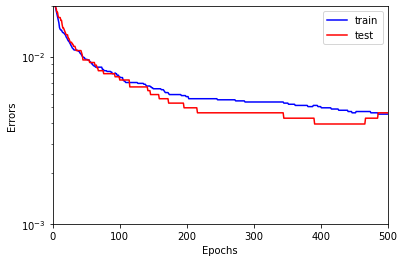

Train/test cost after epoch 500: 0.011005, 0.012990
Train/test error after epoch 500: 0.003131, 0.004285 (min: 0.003131, 0.003626)


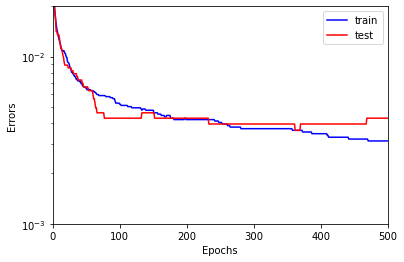

In [44]:
np.random.seed(1) # this makes the results reproduceable - change this if you want to see other initial weights

learning_rate = 0.2
nepochs = 500

loss_functions = {"CE","MSE"}

for lf in loss_functions:
    w,b = initialize_params(x_train.shape[0], random=False)
    params,metrics = optimize(w, b, x_train, y_train, x_test, y_test, nepochs, learning_rate, cost_type=lf, debug = False)

    metrics.plot_error_curves(ymin=0.001, ymax=0.02, logy=True)

#### (Optional) Determine the error rates for different digit pairs

For which digit pairs do you obtain good classification results (measured with the test error rates) - for which not so good?

#### Summary: (What we did learn in these exercises)
##### Exercise 2:
- sigmoid function maps any x value to an 0-1 y-value
- sigmoid function is the inverse function of the logit function
- softplus function is a smoother version (and therefore we can obtain a derivative) of the relu function.

##### Exercise 3:
- Load the mnist dataset
- Inspect the mnist dataset
- Split dataset in train and test
- Normalize dataset
- Make predictions on behalf of sigmoid(w*x+b) (Probability 0-1)
- Cross-Entropy loss function (CE) is well suited for classification problems
- Mean squared error loss function (MSE) is well suited for regression problems
- The learning rate should not be too small, this this increases the training time
- The learning rate should not be too high, because one could miss/escape a local/global optima
- The hyperparameter "learning rate" can be found by using e.g. gridsearch
- To find the optimal number of epochs, a fixed number of epochs can be used at first. The plot of the obtained error-rates vs. the epoch reveals, if the error-rate is converging (no need to increment the number of epochs anymore) or if the error-rate is still decreasing (The error-rate could be even further optimized on behalf of more epochs). Another strategy would be to keep track of the improvments in terms of the error-rate between epochs. As soon as this error-rate does not improve anymore, the algorithm could stop automatically.
- Optimal hyperparameters can be optained on behalf of the gridsearch-strategy.